In [323]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [324]:
#ROI Extraction
def find_petri_dish_thresholding(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to find the Petri dish contour
    petri_dish_contour = None
    min_contour_area = 4000 

    for contour in contours:
        if cv2.contourArea(contour) > min_contour_area:
            petri_dish_contour = contour
            break

    # Extract bounding box coordinates of the Petri dish
    x, y, w, h = cv2.boundingRect(petri_dish_contour)

    # Ensure the bounding box is a square
    side_length = max(w, h)
    x_center, y_center = x + w // 2, y + h // 2

    # Crop the Petri dish from the original image
    petri_dish = image[y:y + h, x:x + w]

    # Resize the cropped Petri dish to 2770x2770
    petri_dish = cv2.resize(petri_dish, (2770, 2770))

    # Convert the cropped Petri dish to grayscale
    petri_dish_gray = cv2.cvtColor(petri_dish, cv2.COLOR_BGR2GRAY)

    return petri_dish_gray

**Image 1**

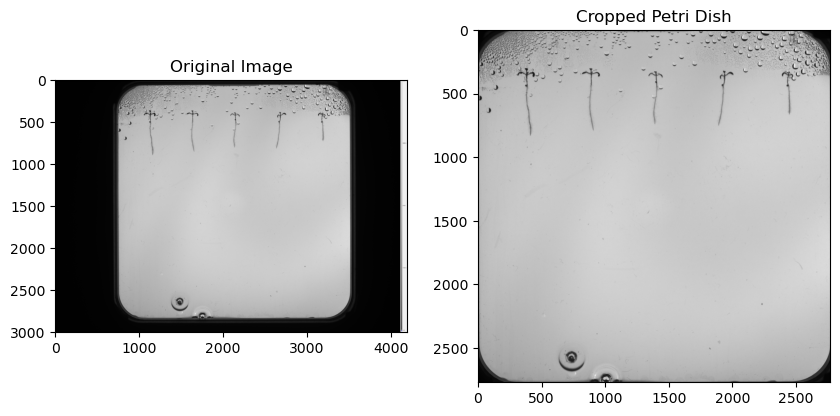

In [325]:
image_1_path = r"C:\Users\User\Desktop\Block B\DataLab tasks\Task 3\Images\plants_1.png"

# Read the image
img_1 = cv2.imread(image_1_path)

# Find and extract the Petri dish using color-based segmentation
plants_1 = find_petri_dish_thresholding(img_1)

# Display the original and cropped images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(plants_1, cv2.COLOR_BGR2RGB))
plt.title("Cropped Petri Dish")

plt.show()

In [326]:
plants_1_cropped = plants_1[200:1000, 200:2600]

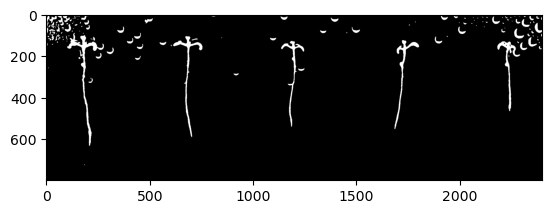

In [327]:
im_1 = cv2.medianBlur(plants_1_cropped, 5)
th, output_im_1 = cv2.threshold(im_1, 160, 250, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)
output_im_1 = cv2.erode(output_im_1, kernel, iterations=1)
output_im_1 = cv2.dilate(output_im_1, kernel, iterations=1)
plt.imshow(output_im_1, cmap='gray')

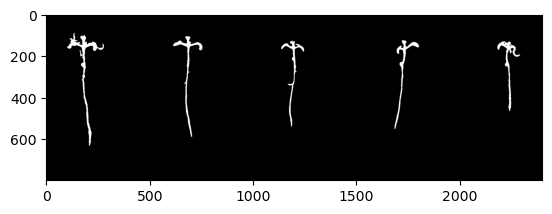

In [328]:
# Assuming output_im_2 is the binary image
min_area = 1500 

# Find connected components
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_im_1)

# Filter out small objects
plants_only = np.zeros_like(labels, dtype=np.uint8)

for i in range(1, retval):
    if stats[i, cv2.CC_STAT_AREA] > min_area:
        plants_only[labels == i] = 255

# Display the filtered image
plt.imshow(plants_only, cmap='gray')


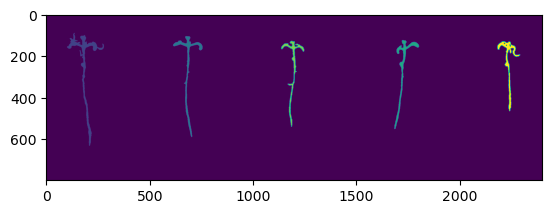

In [329]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(plants_only)
plt.imshow(labels)

**Image 2**

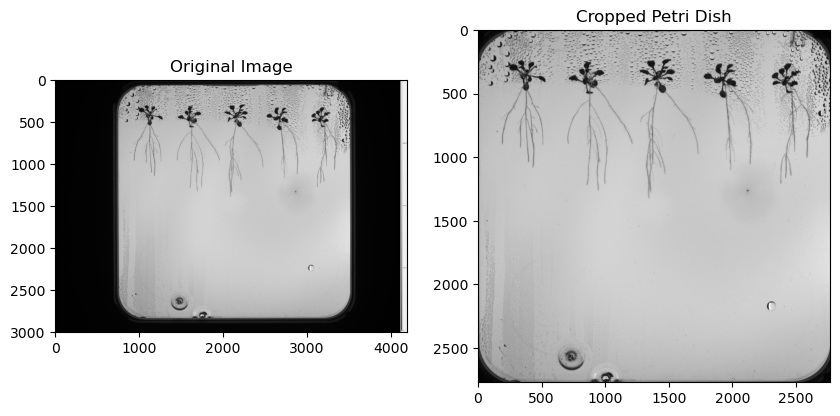

In [330]:
image_2_path = r"C:\Users\User\Desktop\Block B\DataLab tasks\Task 3\Images\plants_2.png"

# Read the image
img_2 = cv2.imread(image_2_path)

# Find and extract the Petri dish using color-based segmentation
plants_2 = find_petri_dish_thresholding(img_2)

# Display the original and cropped images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(plants_2, cv2.COLOR_BGR2RGB))
plt.title("Cropped Petri Dish")

plt.show()

In [331]:
plants_2_cropped = plants_2[170:1500, 100:2700]

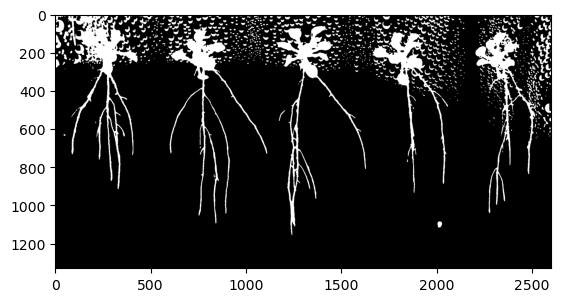

In [332]:
im_2 = cv2.medianBlur(plants_2_cropped, 5)
th, output_im_2 = cv2.threshold(im_2, 175, 250, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)
output_im_2 = cv2.erode(output_im_2, kernel, iterations=1)
output_im_2 = cv2.dilate(output_im_2, kernel, iterations=1)
plt.imshow(output_im_2, cmap='gray')

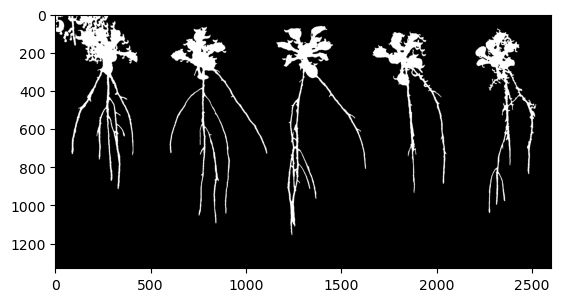

In [333]:
# Assuming output_im_2 is the binary image
min_area = 2800

# Find connected components
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(output_im_2)

# Filter out small objects
plants_only_2 = np.zeros_like(labels, dtype=np.uint8)

for i in range(1, retval):
    if stats[i, cv2.CC_STAT_AREA] > min_area:
        plants_only_2[labels == i] = 255

# Display the filtered image
plt.imshow(plants_only_2, cmap='gray')


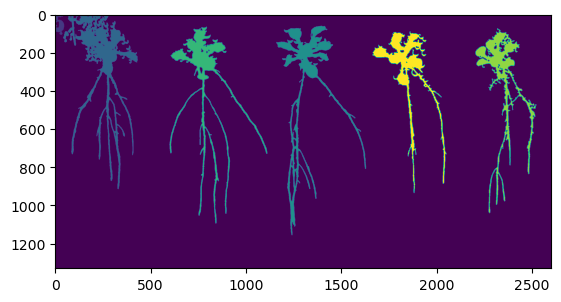

In [334]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(plants_only_2)
plt.imshow(labels)